
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the Nasdaq 100.  Construct portfolios from the 100 stocks in the Nasdaq 100 and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['nasdaq100-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,ATVI,Activision Blizzard,US Stocks,-6.76,-12.81,-15.49,19.37,10.07,6.73,3.56,28.22,19.37,0.69
1,ADBE,Adobe,US Stocks,-33.68,-55.34,-20.78,14.05,25.45,35.24,17.49,28.92,14.05,0.49
2,ADP,ADP,US Stocks,82.71,12.30,14.66,12.81,18.99,22.90,14.67,22.70,12.81,0.56
3,ABNB,Airbnb,US Stocks,-45.39,-1.62,-10.42,-10.42,-10.42,45.09,22.23,37.20,-10.42,-387.62
4,ALGN,Align,US Stocks,-90.06,-63.15,-41.85,6.67,24.94,48.06,34.01,48.65,6.67,0.14
5,GOOGL,Alphabet (Class A),US Stocks,-82.41,-29.05,4.03,23.83,22.74,27.82,20.49,25.78,23.83,0.92
6,GOOG,Alphabet (Class C),US Stocks,-82.79,-28.53,3.32,23.96,23.19,28.06,20.44,26.27,23.96,0.91
7,AMZN,Amazon,US Stocks,-77.42,4.87,-13.59,14.93,26.29,35.20,20.46,26.80,14.93,0.56
8,AMD,AMD,US Stocks,-95.40,-69.71,6.50,45.76,46.64,45.70,34.03,47.92,45.76,0.95
9,AEP,American Electric Power,US Stocks,67.96,59.60,18.36,9.63,11.85,17.80,8.66,21.55,9.63,0.45


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by=None, num_per_group=50)
rank_filtered = rank
rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
91,TSLA,Tesla,US Stocks,7.37,28.54,37.79,168.83,75.07,55.57,30.43,78.25,168.83,2.16
30,COST,Costco,US Stocks,45.79,98.56,53.77,34.21,30.15,27.21,15.44,18.51,34.21,1.85
42,FTNT,Fortinet,US Stocks,-48.19,23.50,50.82,48.85,50.41,38.43,26.81,39.99,48.85,1.22
34,DXCM,DexCom,US Stocks,-20.83,18.77,6.18,54.79,42.41,43.36,27.73,47.23,54.79,1.16
16,AZN,AstraZeneca,US Stocks,32.83,64.68,29.13,22.68,21.02,23.83,13.85,19.96,22.68,1.14
22,AVGO,Broadcom,US Stocks,-22.23,46.81,26.91,26.85,25.88,25.10,17.43,28.82,26.85,0.93
90,TMUS,T-Mobile,US Stocks,43.31,156.72,-3.52,20.60,14.73,22.21,11.95,23.80,20.60,0.87
76,PANW,Palo Alto Networks,US Stocks,-48.46,95.10,59.47,32.97,39.41,31.19,22.25,39.00,32.97,0.85
82,REGN,Regeneron,US Stocks,39.59,50.34,40.82,26.43,13.20,24.16,12.83,32.50,26.43,0.81
77,PAYX,Paychex,US Stocks,74.75,50.09,34.02,19.24,20.63,27.03,17.95,24.13,19.24,0.80


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = top10_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,TSLA,COST,FTNT,DXCM,AZN,AVGO,TMUS,PANW,REGN,PAYX,Ranked Portfolio
Annual Returns,168.83,34.21,48.85,54.79,22.68,26.85,20.60,32.97,26.43,19.24,37.45
Std Dev,78.25,18.51,39.99,47.23,19.96,28.82,23.80,39.00,32.50,24.13,29.23
Sharpe Ratio,2.16,1.85,1.22,1.16,1.14,0.93,0.87,0.85,0.81,0.80,1.28
Weight,0.06,0.12,0.07,0.06,0.13,0.10,0.15,0.08,0.14,0.10,1.00
Worst Typical Down Year,12.33,-2.81,-31.13,-39.67,-17.24,-30.79,-27.00,-45.03,-38.57,-29.02,-21.02
Black Swan,-65.92,-21.32,-71.12,-86.90,-37.20,-59.61,-50.80,-84.03,-71.07,-53.15,-50.25


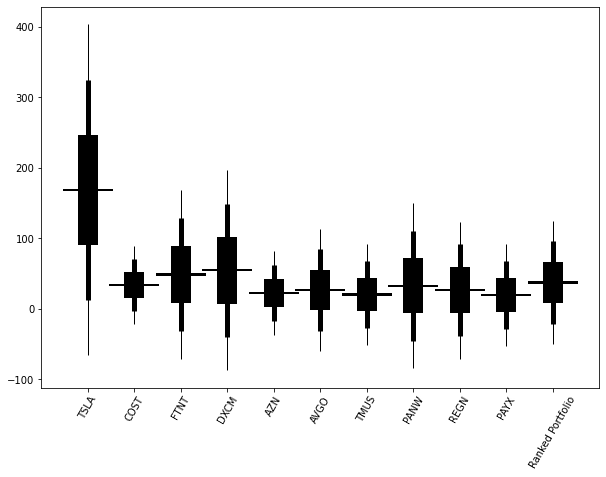

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

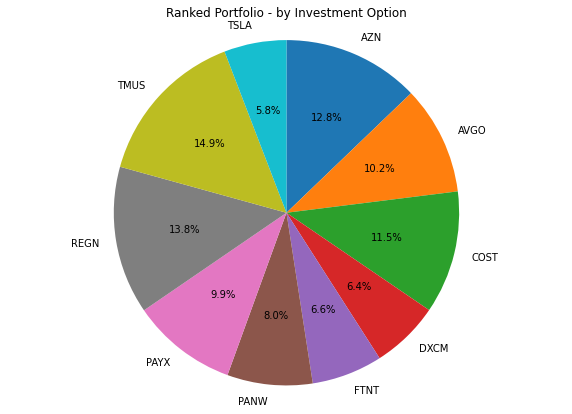

AZN    0.13
AVGO   0.10
COST   0.12
DXCM   0.06
FTNT   0.07
PANW   0.08
PAYX   0.10
REGN   0.14
TMUS   0.15
TSLA   0.06



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    TSLA                           0.0584
    COST                           0.1151
    FTNT                           0.0663
    DXCM                           0.0641
    AZN                            0.1283
    AVGO                           0.1019
    TMUS                           0.1487
    PANW                           0.0799
    REGN                           0.1385
    PAYX                           0.0990


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer......

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.78
    annual_return              58.36
    std_dev                    32.80
    worst typical down year    -7.24
    black_swan                -40.04


Ranked Portfolio Weights:
    TSLA                           0.1900
    COST                           0.2900
    FTNT                           0.1100
    DXCM                           0.0500
    AZN                            0.2900
    AVGO                           0.0000
    TMUS                           0.0300
    PANW                           0.0000
    REGN                           0.0400
    PAYX                           0.0000



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).